In [108]:
import pandas as pd
import nltk
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
import re    ## for regular expression ## remove emogi punctions
import numpy as np
from textblob import TextBlob
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [47]:
!pip install nltk

In [48]:
!pip install wordcloud

In [59]:
!pip install textblob

In [6]:
nltk.download('punkt')    ### puntk - this is tokenizer to convert sentece to words
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\prasa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prasa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\prasa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\prasa\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [109]:
Ultrahuman | PricingRing AIRM1 CGMHome MonitoringBlood VisionStorePartnershipsUltrahuman M1 Glucose Tracking (NFC Required) carousel arrow10101010carousel arrowBuy M1Discover a personalized way to eat better and exercise smarter using the real-time glucose biomarker.Scan based experience (NFC required)One-timeSubscription2 Weeks Trial₹7,4991 CGM SensorDelivery on purchase12 Weekssave ₹9,995₹34,9996 CGM SensorsDelivery on purchase24 Weekssave ₹24,989₹64,99912 CGM SensorsDelivery on demand52 Weekssave ₹59,975₹1,34,99926 CGM SensorsDelivery on demandBuilding for a healthier planet. For every order you place this month, Ultrahuman plants a tree where it's needed most.Free shippingFree delivery to your doorstep in 1-2 days. COD is available.Free replacements & returnsEnjoy up to two annual sensor replacements & hassle-free refunds for additional issues.24x7 supportHave a question? Chat with an M1 specialist or get a call back.Contact UsMade for all4.6 out of 5 stars from 25,000+ subscribersRead all reviewsWhat?Personalized food suggestionsDiscover foods that work for you and optimize the ones that don't. Based on unique glucose metabolism insights, identify foods that give you a stable glucose responseFuel better for your next workoutFuel better for your workouts and sports. Know if you’re under fueled, optimally fueled or over fueled for your activities. Improve performance and recoveryOptimize sleep time glucoseYour glucose levels during sleep hours affect your sleep quality and recovery. Optimize these via the nocturnal glucose insightsHave questions about buying Ultrahuman M1?Contact an M1 specialistWhy?Your glucose variations are an indicator of your metabolic fitness. Metabolism indicates your fat burning ability, energy levels, metabolic disorder risk, athletic performance and sexual health85% of all chronic diseases in the world are metabolic disorders, like diabetes, hypertension, PCOS and obesityHow?Real-time glucose monitoringTrack your real-time glucose with just a quick scan.Metabolic ScoreVisualize your metabolic fitness in real-time with the metabolic score. Learn how lifestyle changes affect your healthFood ScoreMeasure the impact of different foods on your health with the food score and get methods to optimize itFueling ScoreMaximize your sports and workout performance using the fueling score. Understand which foods and lifestyle habits help you improve performance and focus during activitiesPerformance CoachesGet personalized food and exercise guidance to improve your metabolic fitness. Our performance coaches are NSCA certified sports scientists and exercise physiologistsMetabolic NudgesGet personalised nudges and insights to improve your metabolic fitnessTrack Sleep, Stress, FastingContinuously monitor your glucose response to various lifestyle events, like sleep, stress, fasting and other eventsMetabolic VectorsOptimize your metabolic fitness along different vectors, such as focus, longevity and athleticCyborg ArmyGet access to the world’s fastest growing community of like-minded athletes, biohackers and longevity enthusiastsReal-time glucose monitoringTrack your real-time glucose with just a quick scan.Metabolic ScoreVisualize your metabolic fitness in real-time with the metabolic score. Learn how lifestyle changes affect your healthFood ScoreMeasure the impact of different foods on your health with the food score and get methods to optimize itFueling ScoreMaximize your sports and workout performance using the fueling score. Understand which foods and lifestyle habits help you improve performance and focus during activitiesPerformance CoachesGet personalized food and exercise guidance to improve your metabolic fitness. Our performance coaches are NSCA certified sports scientists and exercise physiologistsMetabolic NudgesGet personalised nudges and insights to improve your metabolic fitnessTrack Sleep, Stress, FastingContinuously monitor your glucose response to various lifestyle events, like sleep, stress, fasting and other eventsMetabolic VectorsOptimize your metabolic fitness along different vectors, such as focus, longevity and athleticCyborg ArmyGet access to the world’s fastest growing community of like-minded athletes, biohackers and longevity enthusiastsUser TestimonialsTrusted by the BestHS PrannoyIndian Badminton ChampionRobin SinghIndian Football ChampionAishwarya PissayIndian circuit and Off-road Motorcycle World ChampionNaveen John4 time winner of the Indian National Cycling ChampionshipsKieren DsouzaUltramarathon Runner and Endurance AthleteVarsha Rohit3-time National Gold Medalist SprinterKabir RachureUltra Cyclist User Reviews4.9App storeDownload on AppStore4.5Play storeDownload on PlaystoreHpatilukProud to Be CyborgVerified purchaseGenerally I never review however here would like to congratulate the #Ultrahuman team for this app and insight on health management. Rated 5 star as everything is awesome from onboarding, sensor delivery, app UI, activity classes, customer service, etc. Thanks!ApoorvSharmaThe API for your bodyVerified purchaseWhat an amazing app experience and deep insights into how your body works. This truly goes out to show how each body is different and how nutrition can have an impact on us. Strongly recommend trying it at least once. Your life will never be the same!AK_AK_AKGreat tech and even better teamVerified purchaseThis is a game-changer and has helped me understand multiple aspect of my metabolic health made me conscious about the way I eat and what I eat, also Ultrahuman team is super super responsive and helpful really loving the experience.RakannanBrilliant appVerified purchaseThe concept of using CGM to guide your training and food plan is brilliant. The app is also very well laid out.NayanavaIn love with the appVerified purchaseThis has to be the best device after Apple Watch which helps track the blood glucose levels, in turn helping maintain a healthy lifestyle by allowing me make the right food choices while staying away from the others. It has kind of become like a challenge to maintain blood glucose levels below 110 now throughout the day!! I have quit almost all foods that have added sugar.Athif HasanThe Ultrahuman Cyborg experienceRepeat purchaseUltrahuman M1 gave me a complete insight the impact every food has to my body. Did not follow any fancy diet, yet managed to educate myself around food, and built a sustainable & healthy lifestyle.Ranger3010Absolutely Amazing! Its an integrated part of my body!Verified purchaseUltrahuman sensors are easy to wear and very effective in diet control. It helps me track my calorie intake and allows me to be in absolute control of my sugar! Highly recommended for people trying to control there sugar and maintain optimal body weight.Srinath RajamThe pursuit of good healthVerified purchase...is impossible without the ability to control one’s blood glucose levels. As a nutritionist and a cycling and fitness coach, I stress food as 80% impact on health and CGM is an indispensable tool to help every individual figure out foods to eat/ avoid and in the right quantities… We all react differently to the same food so eliminating guesswork is an important aspect to overall metabolic health Keep up the great work UH, your supporting data is amazing.Show more Buy M1Discover a personalized way to eat better and exercise smarter using the real-time glucose biomarker.Scan based experience (NFC required)One-timeSubscription2 Weeks Trial₹7,4991 CGM SensorDelivery on purchase12 Weekssave ₹9,995₹34,9996 CGM SensorsDelivery on purchase24 Weekssave ₹24,989₹64,99912 CGM SensorsDelivery on demand52 Weekssave ₹59,975₹1,34,99926 CGM SensorsDelivery on demandAdd 12 Weeks Plan to cartBuilding for a healthier planet. For every order you place this month, Ultrahuman plants a tree where it's needed most.Building for a healthier planet. For every order you place this month, Ultrahuman plants a tree where it's needed most.Add 12 Weeks Plan to cartFAQDoes my device need to be NFC-enabled to pair the CGM sensor?Yes! It is essential that your phone is NFC enabled. If not, you will not be able to pair the Continuous Glucose Monitor (CGM sensor) with your phone.How long does the sensor last? Is it reusable?Each sensor lasts for 14 days. And no, they’re not reusable. Each sensor can be used only once, for a 14-day stint, after which you may replace it with a fresh one.Is there a needle in the sensor? Does a needle stay in my skin?Yes, and no. The Continuous Glucose Monitor (CGM sensor) comes with a hollow needle that is used to make a tiny incision in your skin (it doesn’t hurt more than an ant bite!), after which a thread-like filament is safely placed and remains under your skin for the period you have the sensor on.Does it hurt while putting on the sensor?Not more than an ant bite. It's normal to feel some sensation during the first day or so, as you are getting used to the sensor.If you feel pain or discomfort, contact the Ultrahuman team through our in-app chat service. We can help you decide if you need to remove the sensor altogether and re-apply a fresh one.Can I take the sensor off every night?Nope! Once applied, the sensor should not be taken off for the 14-day period unless you experience any pain or discomfort.Can I wear my sensor while bathing, swimming, or surfing?Yes, yes and yes! Your glucose sensor is water-resistant for up to 30 minutes and in depths up to 1 meter (3 feet). So you can shower, swim, and surf while wearing your sensor.Can the sensor hold up against all skin types?Yes, the sensor is compatible with all skin types. The patch used to cover the sensor is water/sweat resistant. So, the sensor stays intact. Therefore it is recommended to have a patch on at all times.Once the sensor is removed, does it bleed? No. The Ultrahuman M1 Glucose Tracking measures your glucose levels through the interstitial fluid. There is generally no bleeding while removing the sensor.Do I get access to the Ultrahuman Premium subscription along with my Ultrahuman M1 Glucose Tracking subscription?Yes. Your Ultrahuman M1 Glucose Tracking subscription comes bundled with the Ultrahuman Premium subscription—which gives you access to 1000+ hours of fitness and recovery masterclasses.What does my Ultrahuman M1 Glucose Tracking plan include?Your Ultrahuman M1 plan should include:CGM sensors (units as per the plan chosen)Three Ultrahuman hypoallergenic protective patches per CGM sensorSanitising wipesAccess to Ultrahuman digital content. That's 1000+ hours of fitness and recovery masterclassesAccess to Cyborg Army, an Ultrahuman community of 5000+ active membersAccess to live and certified Performance Coaches who can guide you along your metabolic fitness journey to help you make the best use of the platform. (Please note that no prescriptive meal/workout plans will be provided)Note: We use versions of third-party manufactured CGM sensors such as Abbott FreeStyle Libre, in their original packaging.What is ‘Delivery on Demand?’By default, we ship the CGMs in the following batches:12 Weeks6 CGMs shipped together at the time of purchase.24 Weeks12 CGMs shipped together at the time of purchase.52 WeeksBatch 1: 6 CGMs shipped together at the time of purchaseBatch 2: 10 CGMs shipped together on the 3rd monthBatch 3: 10 CGMs shipped together on the 5th monthHowever, if you prefer a different cadence, we’re happy to arrange it for you.How can I make changes to my subscription plan?It’s easy. If you’re looking to skip/delay, or pause your subscription, use this link to manage it. If you’re looking to cancel your subscription, please reach out to cyborg@ultrahuman.com.If I subscribe, when will I get my next order?Your order will be processed as soon as we receive a payment confirmation from your account. Since this is a monthly subscription, we should be able to ship you the order every 30 days. Delivery timelines are usually anywhere between 2-5 days.Ultrahuman's products and services are intended to provide general information for users to improve their metabolic fitness and general wellness. The products and services are not intended for disease management, treatment, or prevention, and should not be relied upon for any diagnostic or treatment decision. We do not intend to substitute professional medical opinion on the treatment, diagnosis, prevention or alleviation of diabetes or any other disease or disability. Always consult with a doctor or qualified healthcare professional about any health condition and/or concerns, that you may have. Please do not disregard/delay seeking professional medical advice or treatment because of information read on or accessed through our products and services.Please work with your healthcare professional during the use of the third-party continuous glucose monitoring device (CGM) if you have sensitive skin or a skin condition or have suffered a skin injury due to the use of the CGM. In case of any skin rashes, irritation, allergies or injuries as a result of use of the CGM and/or adhesive patch, please inform us and/or your healthcare professional without delay.Your cart is emptyBrowse through our products and find something for you.Back to browseProductsUltrahuman Ring AIRUltrahuman M1Ultrahuman HomeUltrahuman XUltrahuman VisionUltrahuman Blood VisionUltrahuman BlogAll ProductsCompanyAbout UsPress and NewsEnvironmentScienceBrand KitFor HealthcareFor DistributorsFor Sports TeamsFor Other Business OpportunitiesUltrahuman vs Oura3D Print Ring SizesCareersContact usEmailsupport@ultrahuman.comPhone8081-349-514Download appCopyright 2020-2023 Ultrahuman Healthcare Pvt Ltd All rights reserved.Ring AIR Terms of SaleM1 Terms of SalePrivacy PolicyTerms of UseInstant WhatsApp support Get an instant callback Star ratingThe concept of using CGM to guide your training and food plan is brilliant. The app is also very well laid out.Rakannan - user since Jul 2021Star ratingI didn't follow any fancy diet, yet managed to educate myself around food, and built a sustainable & healthy lifestyle.Athif Hasan - user since Sep 2021Star ratingUltrahuman M1 has done what meal plans and diets have failed to do; make me better without all the restrictions.Anwar Shai - user since Jun 202110% off on your first purchaseSubscribe to our WhatsApp for the latest updates and offers, and enjoy 10% off on your first purchase.Unsubscribe any time. View our Privacy Policy.Wa-Link

SyntaxError: invalid character '₹' (U+20B9) (2109092105.py, line 1)

In [110]:
text = """Ultrahuman | PricingRing AIRM1 CGMHome MonitoringBlood VisionStorePartnershipsUltrahuman M1 Glucose Tracking (NFC Required) carousel arrow10101010carousel arrowBuy M1Discover a personalized way to eat better and exercise smarter using the real-time glucose biomarker.Scan based experience (NFC required)One-timeSubscription2 Weeks Trial₹7,4991 CGM SensorDelivery on purchase12 Weekssave ₹9,995₹34,9996 CGM SensorsDelivery on purchase24 Weekssave ₹24,989₹64,99912 CGM SensorsDelivery on demand52 Weekssave ₹59,975₹1,34,99926 CGM SensorsDelivery on demandBuilding for a healthier planet. For every order you place this month, Ultrahuman plants a tree where it's needed most.Free shippingFree delivery to your doorstep in 1-2 days. COD is available.Free replacements & returnsEnjoy up to two annual sensor replacements & hassle-free refunds for additional issues.24x7 supportHave a question? Chat with an M1 specialist or get a call back.Contact UsMade for all4.6 out of 5 stars from 25,000+ subscribersRead all reviewsWhat?Personalized food suggestionsDiscover foods that work for you and optimize the ones that don't. Based on unique glucose metabolism insights, identify foods that give you a stable glucose responseFuel better for your next workoutFuel better for your workouts and sports. Know if you’re under fueled, optimally fueled or over fueled for your activities. Improve performance and recoveryOptimize sleep time glucoseYour glucose levels during sleep hours affect your sleep quality and recovery. Optimize these via the nocturnal glucose insightsHave questions about buying Ultrahuman M1?Contact an M1 specialistWhy?Your glucose variations are an indicator of your metabolic fitness. Metabolism indicates your fat burning ability, energy levels, metabolic disorder risk, athletic performance and sexual health85% of all chronic diseases in the world are metabolic disorders, like diabetes, hypertension, PCOS and obesityHow?Real-time glucose monitoringTrack your real-time glucose with just a quick scan.Metabolic ScoreVisualize your metabolic fitness in real-time with the metabolic score. Learn how lifestyle changes affect your healthFood ScoreMeasure the impact of different foods on your health with the food score and get methods to optimize itFueling ScoreMaximize your sports and workout performance using the fueling score. Understand which foods and lifestyle habits help you improve performance and focus during activitiesPerformance CoachesGet personalized food and exercise guidance to improve your metabolic fitness. Our performance coaches are NSCA certified sports scientists and exercise physiologistsMetabolic NudgesGet personalised nudges and insights to improve your metabolic fitnessTrack Sleep, Stress, FastingContinuously monitor your glucose response to various lifestyle events, like sleep, stress, fasting and other eventsMetabolic VectorsOptimize your metabolic fitness along different vectors, such as focus, longevity and athleticCyborg ArmyGet access to the world’s fastest growing community of like-minded athletes, biohackers and longevity enthusiastsReal-time glucose monitoringTrack your real-time glucose with just a quick scan.Metabolic ScoreVisualize your metabolic fitness in real-time with the metabolic score. Learn how lifestyle changes affect your healthFood ScoreMeasure the impact of different foods on your health with the food score and get methods to optimize itFueling ScoreMaximize your sports and workout performance using the fueling score. Understand which foods and lifestyle habits help you improve performance and focus during activitiesPerformance CoachesGet personalized food and exercise guidance to improve your metabolic fitness. Our performance coaches are NSCA certified sports scientists and exercise physiologistsMetabolic NudgesGet personalised nudges and insights to improve your metabolic fitnessTrack Sleep, Stress, FastingContinuously monitor your glucose response to various lifestyle events, like sleep, stress, fasting and other eventsMetabolic VectorsOptimize your metabolic fitness along different vectors, such as focus, longevity and athleticCyborg ArmyGet access to the world’s fastest growing community of like-minded athletes, biohackers and longevity enthusiastsUser TestimonialsTrusted by the BestHS PrannoyIndian Badminton ChampionRobin SinghIndian Football ChampionAishwarya PissayIndian circuit and Off-road Motorcycle World ChampionNaveen John4 time winner of the Indian National Cycling ChampionshipsKieren DsouzaUltramarathon Runner and Endurance AthleteVarsha Rohit3-time National Gold Medalist SprinterKabir RachureUltra Cyclist User Reviews4.9App storeDownload on AppStore4.5Play storeDownload on PlaystoreHpatilukProud to Be CyborgVerified purchaseGenerally I never review however here would like to congratulate the #Ultrahuman team for this app and insight on health management. Rated 5 star as everything is awesome from onboarding, sensor delivery, app UI, activity classes, customer service, etc. Thanks!ApoorvSharmaThe API for your bodyVerified purchaseWhat an amazing app experience and deep insights into how your body works. This truly goes out to show how each body is different and how nutrition can have an impact on us. Strongly recommend trying it at least once. Your life will never be the same!AK_AK_AKGreat tech and even better teamVerified purchaseThis is a game-changer and has helped me understand multiple aspect of my metabolic health made me conscious about the way I eat and what I eat, also Ultrahuman team is super super responsive and helpful really loving the experience.RakannanBrilliant appVerified purchaseThe concept of using CGM to guide your training and food plan is brilliant. The app is also very well laid out.NayanavaIn love with the appVerified purchaseThis has to be the best device after Apple Watch which helps track the blood glucose levels, in turn helping maintain a healthy lifestyle by allowing me make the right food choices while staying away from the others. It has kind of become like a challenge to maintain blood glucose levels below 110 now throughout the day!! I have quit almost all foods that have added sugar.Athif HasanThe Ultrahuman Cyborg experienceRepeat purchaseUltrahuman M1 gave me a complete insight the impact every food has to my body. Did not follow any fancy diet, yet managed to educate myself around food, and built a sustainable & healthy lifestyle.Ranger3010Absolutely Amazing! Its an integrated part of my body!Verified purchaseUltrahuman sensors are easy to wear and very effective in diet control. It helps me track my calorie intake and allows me to be in absolute control of my sugar! Highly recommended for people trying to control there sugar and maintain optimal body weight.Srinath RajamThe pursuit of good healthVerified purchase...is impossible without the ability to control one’s blood glucose levels. As a nutritionist and a cycling and fitness coach, I stress food as 80% impact on health and CGM is an indispensable tool to help every individual figure out foods to eat/ avoid and in the right quantities… We all react differently to the same food so eliminating guesswork is an important aspect to overall metabolic health Keep up the great work UH, your supporting data is amazing.Show more Buy M1Discover a personalized way to eat better and exercise smarter using the real-time glucose biomarker.Scan based experience (NFC required)One-timeSubscription2 Weeks Trial₹7,4991 CGM SensorDelivery on purchase12 Weekssave ₹9,995₹34,9996 CGM SensorsDelivery on purchase24 Weekssave ₹24,989₹64,99912 CGM SensorsDelivery on demand52 Weekssave ₹59,975₹1,34,99926 CGM SensorsDelivery on demandAdd 12 Weeks Plan to cartBuilding for a healthier planet. For every order you place this month, Ultrahuman plants a tree where it's needed most.Building for a healthier planet. For every order you place this month, Ultrahuman plants a tree where it's needed most.Add 12 Weeks Plan to cartFAQDoes my device need to be NFC-enabled to pair the CGM sensor?Yes! It is essential that your phone is NFC enabled. If not, you will not be able to pair the Continuous Glucose Monitor (CGM sensor) with your phone.How long does the sensor last? Is it reusable?Each sensor lasts for 14 days. And no, they’re not reusable. Each sensor can be used only once, for a 14-day stint, after which you may replace it with a fresh one.Is there a needle in the sensor? Does a needle stay in my skin?Yes, and no. The Continuous Glucose Monitor (CGM sensor) comes with a hollow needle that is used to make a tiny incision in your skin (it doesn’t hurt more than an ant bite!), after which a thread-like filament is safely placed and remains under your skin for the period you have the sensor on.Does it hurt while putting on the sensor?Not more than an ant bite. It's normal to feel some sensation during the first day or so, as you are getting used to the sensor.If you feel pain or discomfort, contact the Ultrahuman team through our in-app chat service. We can help you decide if you need to remove the sensor altogether and re-apply a fresh one.Can I take the sensor off every night?Nope! Once applied, the sensor should not be taken off for the 14-day period unless you experience any pain or discomfort.Can I wear my sensor while bathing, swimming, or surfing?Yes, yes and yes! Your glucose sensor is water-resistant for up to 30 minutes and in depths up to 1 meter (3 feet). So you can shower, swim, and surf while wearing your sensor.Can the sensor hold up against all skin types?Yes, the sensor is compatible with all skin types. The patch used to cover the sensor is water/sweat resistant. So, the sensor stays intact. Therefore it is recommended to have a patch on at all times.Once the sensor is removed, does it bleed? No. The Ultrahuman M1 Glucose Tracking measures your glucose levels through the interstitial fluid. There is generally no bleeding while removing the sensor.Do I get access to the Ultrahuman Premium subscription along with my Ultrahuman M1 Glucose Tracking subscription?Yes. Your Ultrahuman M1 Glucose Tracking subscription comes bundled with the Ultrahuman Premium subscription—which gives you access to 1000+ hours of fitness and recovery masterclasses.What does my Ultrahuman M1 Glucose Tracking plan include?Your Ultrahuman M1 plan should include:CGM sensors (units as per the plan chosen)Three Ultrahuman hypoallergenic protective patches per CGM sensorSanitising wipesAccess to Ultrahuman digital content. That's 1000+ hours of fitness and recovery masterclassesAccess to Cyborg Army, an Ultrahuman community of 5000+ active membersAccess to live and certified Performance Coaches who can guide you along your metabolic fitness journey to help you make the best use of the platform. (Please note that no prescriptive meal/workout plans will be provided)Note: We use versions of third-party manufactured CGM sensors such as Abbott FreeStyle Libre, in their original packaging.What is ‘Delivery on Demand?’By default, we ship the CGMs in the following batches:12 Weeks6 CGMs shipped together at the time of purchase.24 Weeks12 CGMs shipped together at the time of purchase.52 WeeksBatch 1: 6 CGMs shipped together at the time of purchaseBatch 2: 10 CGMs shipped together on the 3rd monthBatch 3: 10 CGMs shipped together on the 5th monthHowever, if you prefer a different cadence, we’re happy to arrange it for you.How can I make changes to my subscription plan?It’s easy. If you’re looking to skip/delay, or pause your subscription, use this link to manage it. If you’re looking to cancel your subscription, please reach out to cyborg@ultrahuman.com.If I subscribe, when will I get my next order?Your order will be processed as soon as we receive a payment confirmation from your account. Since this is a monthly subscription, we should be able to ship you the order every 30 days. Delivery timelines are usually anywhere between 2-5 days.Ultrahuman's products and services are intended to provide general information for users to improve their metabolic fitness and general wellness. The products and services are not intended for disease management, treatment, or prevention, and should not be relied upon for any diagnostic or treatment decision. We do not intend to substitute professional medical opinion on the treatment, diagnosis, prevention or alleviation of diabetes or any other disease or disability. Always consult with a doctor or qualified healthcare professional about any health condition and/or concerns, that you may have. Please do not disregard/delay seeking professional medical advice or treatment because of information read on or accessed through our products and services.Please work with your healthcare professional during the use of the third-party continuous glucose monitoring device (CGM) if you have sensitive skin or a skin condition or have suffered a skin injury due to the use of the CGM. In case of any skin rashes, irritation, allergies or injuries as a result of use of the CGM and/or adhesive patch, please inform us and/or your healthcare professional without delay.Your cart is emptyBrowse through our products and find something for you.Back to browseProductsUltrahuman Ring AIRUltrahuman M1Ultrahuman HomeUltrahuman XUltrahuman VisionUltrahuman Blood VisionUltrahuman BlogAll ProductsCompanyAbout UsPress and NewsEnvironmentScienceBrand KitFor HealthcareFor DistributorsFor Sports TeamsFor Other Business OpportunitiesUltrahuman vs Oura3D Print Ring SizesCareersContact usEmailsupport@ultrahuman.comPhone8081-349-514Download appCopyright 2020-2023 Ultrahuman Healthcare Pvt Ltd All rights reserved.Ring AIR Terms of SaleM1 Terms of SalePrivacy PolicyTerms of UseInstant WhatsApp support Get an instant callback Star ratingThe concept of using CGM to guide your training and food plan is brilliant. The app is also very well laid out.Rakannan - user since Jul 2021Star ratingI didn't follow any fancy diet, yet managed to educate myself around food, and built a sustainable & healthy lifestyle.Athif Hasan - user since Sep 2021Star ratingUltrahuman M1 has done what meal plans and diets have failed to do; make me better without all the restrictions.Anwar Shai - user since Jun 202110% off on your first purchaseSubscribe to our WhatsApp for the latest updates and offers, and enjoy 10% off on your first purchase.Unsubscribe any time. View our Privacy Policy.Wa-Link"""

In [111]:
import pandas as pd
from io import StringIO

def read_text(text):
    # Use StringIO to convert the text into a file-like object
    text_data = StringIO(text)

    # Read the data into a pandas DataFrame
    df = pd.read_csv(text_data, sep="\t")

    return df


In [112]:
df = read_text(text)
print(df)


Empty DataFrame
Columns: [Ultrahuman | PricingRing AIRM1 CGMHome MonitoringBlood VisionStorePartnershipsUltrahuman M1 Glucose Tracking (NFC Required) carousel arrow10101010carousel arrowBuy M1Discover a personalized way to eat better and exercise smarter using the real-time glucose biomarker.Scan based experience (NFC required)One-timeSubscription2 Weeks Trial₹7,4991 CGM SensorDelivery on purchase12 Weekssave ₹9,995₹34,9996 CGM SensorsDelivery on purchase24 Weekssave ₹24,989₹64,99912 CGM SensorsDelivery on demand52 Weekssave ₹59,975₹1,34,99926 CGM SensorsDelivery on demandBuilding for a healthier planet. For every order you place this month, Ultrahuman plants a tree where it's needed most.Free shippingFree delivery to your doorstep in 1-2 days. COD is available.Free replacements & returnsEnjoy up to two annual sensor replacements & hassle-free refunds for additional issues.24x7 supportHave a question? Chat with an M1 specialist or get a call back.Contact UsMade for all4.6 out of 5 star

In [113]:
import pandas as pd

# Convert DataFrame to dictionary with 'ID' as keys and other columns as values
dict_result = df.T.to_dict('list')

print(dict_result)


{}


In [114]:
df

""


In [115]:
dict_list = df.to_dict(orient='records')

print(dict_list)

[]


In [116]:
dict_list

[]

In [117]:
text

"Ultrahuman | PricingRing AIRM1 CGMHome MonitoringBlood VisionStorePartnershipsUltrahuman M1 Glucose Tracking (NFC Required) carousel arrow10101010carousel arrowBuy M1Discover a personalized way to eat better and exercise smarter using the real-time glucose biomarker.Scan based experience (NFC required)One-timeSubscription2 Weeks Trial₹7,4991 CGM SensorDelivery on purchase12 Weekssave ₹9,995₹34,9996 CGM SensorsDelivery on purchase24 Weekssave ₹24,989₹64,99912 CGM SensorsDelivery on demand52 Weekssave ₹59,975₹1,34,99926 CGM SensorsDelivery on demandBuilding for a healthier planet. For every order you place this month, Ultrahuman plants a tree where it's needed most.Free shippingFree delivery to your doorstep in 1-2 days. COD is available.Free replacements & returnsEnjoy up to two annual sensor replacements & hassle-free refunds for additional issues.24x7 supportHave a question? Chat with an M1 specialist or get a call back.Contact UsMade for all4.6 out of 5 stars from 25,000+ subscriber

In [118]:
def read_text_to_dict(text):
    # Use StringIO to convert the text into a file-like object
    text_data = StringIO(text)

    # Read the data into a pandas DataFrame
    df = pd.read_csv(text_data, sep="\t", header=None)

    # Convert DataFrame to a dictionary
    # Assuming the first column is the key and the second column is the value
    dictionary = pd.Series(df[1].values,index=df[0]).to_dict()

    return dictionary


In [119]:
read_text_to_dict

<function __main__.read_text_to_dict(text)>

In [120]:
text

"Ultrahuman | PricingRing AIRM1 CGMHome MonitoringBlood VisionStorePartnershipsUltrahuman M1 Glucose Tracking (NFC Required) carousel arrow10101010carousel arrowBuy M1Discover a personalized way to eat better and exercise smarter using the real-time glucose biomarker.Scan based experience (NFC required)One-timeSubscription2 Weeks Trial₹7,4991 CGM SensorDelivery on purchase12 Weekssave ₹9,995₹34,9996 CGM SensorsDelivery on purchase24 Weekssave ₹24,989₹64,99912 CGM SensorsDelivery on demand52 Weekssave ₹59,975₹1,34,99926 CGM SensorsDelivery on demandBuilding for a healthier planet. For every order you place this month, Ultrahuman plants a tree where it's needed most.Free shippingFree delivery to your doorstep in 1-2 days. COD is available.Free replacements & returnsEnjoy up to two annual sensor replacements & hassle-free refunds for additional issues.24x7 supportHave a question? Chat with an M1 specialist or get a call back.Contact UsMade for all4.6 out of 5 stars from 25,000+ subscriber

In [121]:
 # Tokenization
sentences = nltk.sent_tokenize(text)
print(sentences)

['Ultrahuman | PricingRing AIRM1 CGMHome MonitoringBlood VisionStorePartnershipsUltrahuman M1 Glucose Tracking (NFC Required) carousel arrow10101010carousel arrowBuy M1Discover a personalized way to eat better and exercise smarter using the real-time glucose biomarker.Scan based experience (NFC required)One-timeSubscription2 Weeks Trial₹7,4991 CGM SensorDelivery on purchase12 Weekssave ₹9,995₹34,9996 CGM SensorsDelivery on purchase24 Weekssave ₹24,989₹64,99912 CGM SensorsDelivery on demand52 Weekssave ₹59,975₹1,34,99926 CGM SensorsDelivery on demandBuilding for a healthier planet.', "For every order you place this month, Ultrahuman plants a tree where it's needed most.Free shippingFree delivery to your doorstep in 1-2 days.", 'COD is available.Free replacements & returnsEnjoy up to two annual sensor replacements & hassle-free refunds for additional issues.24x7 supportHave a question?', "Chat with an M1 specialist or get a call back.Contact UsMade for all4.6 out of 5 stars from 25,000+ 

In [122]:
 # Lowercasing and removing non-alphabetic characters
text = re.sub("[^A-Za-z]+"," ",text).lower()

In [123]:
text

'ultrahuman pricingring airm cgmhome monitoringblood visionstorepartnershipsultrahuman m glucose tracking nfc required carousel arrow carousel arrowbuy m discover a personalized way to eat better and exercise smarter using the real time glucose biomarker scan based experience nfc required one timesubscription weeks trial cgm sensordelivery on purchase weekssave cgm sensorsdelivery on purchase weekssave cgm sensorsdelivery on demand weekssave cgm sensorsdelivery on demandbuilding for a healthier planet for every order you place this month ultrahuman plants a tree where it s needed most free shippingfree delivery to your doorstep in days cod is available free replacements returnsenjoy up to two annual sensor replacements hassle free refunds for additional issues x supporthave a question chat with an m specialist or get a call back contact usmade for all out of stars from subscribersread all reviewswhat personalized food suggestionsdiscover foods that work for you and optimize the ones th

In [124]:
# Tokenization
words = word_tokenize(text)

In [125]:
words

['ultrahuman',
 'pricingring',
 'airm',
 'cgmhome',
 'monitoringblood',
 'visionstorepartnershipsultrahuman',
 'm',
 'glucose',
 'tracking',
 'nfc',
 'required',
 'carousel',
 'arrow',
 'carousel',
 'arrowbuy',
 'm',
 'discover',
 'a',
 'personalized',
 'way',
 'to',
 'eat',
 'better',
 'and',
 'exercise',
 'smarter',
 'using',
 'the',
 'real',
 'time',
 'glucose',
 'biomarker',
 'scan',
 'based',
 'experience',
 'nfc',
 'required',
 'one',
 'timesubscription',
 'weeks',
 'trial',
 'cgm',
 'sensordelivery',
 'on',
 'purchase',
 'weekssave',
 'cgm',
 'sensorsdelivery',
 'on',
 'purchase',
 'weekssave',
 'cgm',
 'sensorsdelivery',
 'on',
 'demand',
 'weekssave',
 'cgm',
 'sensorsdelivery',
 'on',
 'demandbuilding',
 'for',
 'a',
 'healthier',
 'planet',
 'for',
 'every',
 'order',
 'you',
 'place',
 'this',
 'month',
 'ultrahuman',
 'plants',
 'a',
 'tree',
 'where',
 'it',
 's',
 'needed',
 'most',
 'free',
 'shippingfree',
 'delivery',
 'to',
 'your',
 'doorstep',
 'in',
 'days',
 'cod

In [126]:
# Stop words removal
stop_words = set(stopwords.words('english'))
filtered_sentence = [word for word in words if not word in stop_words]
text = ' '.join(filtered_sentence)
print(text)

ultrahuman pricingring airm cgmhome monitoringblood visionstorepartnershipsultrahuman glucose tracking nfc required carousel arrow carousel arrowbuy discover personalized way eat better exercise smarter using real time glucose biomarker scan based experience nfc required one timesubscription weeks trial cgm sensordelivery purchase weekssave cgm sensorsdelivery purchase weekssave cgm sensorsdelivery demand weekssave cgm sensorsdelivery demandbuilding healthier planet every order place month ultrahuman plants tree needed free shippingfree delivery doorstep days cod available free replacements returnsenjoy two annual sensor replacements hassle free refunds additional issues x supporthave question chat specialist get call back contact usmade stars subscribersread reviewswhat personalized food suggestionsdiscover foods work optimize ones based unique glucose metabolism insights identify foods give stable glucose responsefuel better next workoutfuel better workouts sports know fueled optimal

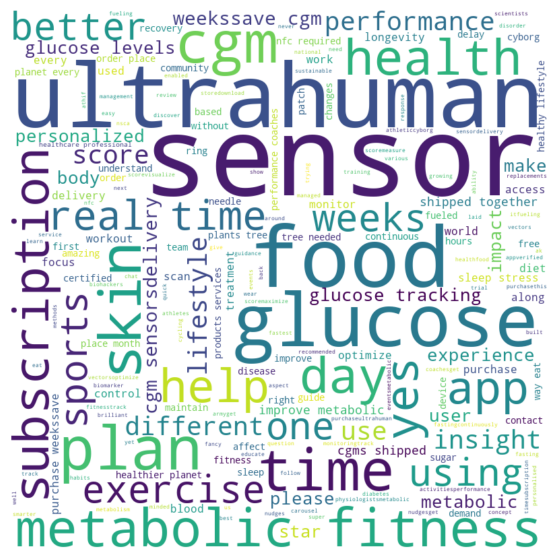

In [127]:
# Word cloud
wordcloud = WordCloud(width=800, height=800, background_color="white").generate(str(text))
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [128]:
# Stemming
ps = PorterStemmer()
stemmed_words = [ps.stem(word) for word in words]
print(stemmed_words)

['ultrahuman', 'pricingr', 'airm', 'cgmhome', 'monitoringblood', 'visionstorepartnershipsultrahuman', 'm', 'glucos', 'track', 'nfc', 'requir', 'carousel', 'arrow', 'carousel', 'arrowbuy', 'm', 'discov', 'a', 'person', 'way', 'to', 'eat', 'better', 'and', 'exercis', 'smarter', 'use', 'the', 'real', 'time', 'glucos', 'biomark', 'scan', 'base', 'experi', 'nfc', 'requir', 'one', 'timesubscript', 'week', 'trial', 'cgm', 'sensordeliveri', 'on', 'purchas', 'weekssav', 'cgm', 'sensorsdeliveri', 'on', 'purchas', 'weekssav', 'cgm', 'sensorsdeliveri', 'on', 'demand', 'weekssav', 'cgm', 'sensorsdeliveri', 'on', 'demandbuild', 'for', 'a', 'healthier', 'planet', 'for', 'everi', 'order', 'you', 'place', 'thi', 'month', 'ultrahuman', 'plant', 'a', 'tree', 'where', 'it', 's', 'need', 'most', 'free', 'shippingfre', 'deliveri', 'to', 'your', 'doorstep', 'in', 'day', 'cod', 'is', 'avail', 'free', 'replac', 'returnsenjoy', 'up', 'to', 'two', 'annual', 'sensor', 'replac', 'hassl', 'free', 'refund', 'for', '

In [129]:
# Lemmatization
lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(word, pos='v') for word in words]
print(lemmatized_words)

['ultrahuman', 'pricingring', 'airm', 'cgmhome', 'monitoringblood', 'visionstorepartnershipsultrahuman', 'm', 'glucose', 'track', 'nfc', 'require', 'carousel', 'arrow', 'carousel', 'arrowbuy', 'm', 'discover', 'a', 'personalize', 'way', 'to', 'eat', 'better', 'and', 'exercise', 'smarter', 'use', 'the', 'real', 'time', 'glucose', 'biomarker', 'scan', 'base', 'experience', 'nfc', 'require', 'one', 'timesubscription', 'weeks', 'trial', 'cgm', 'sensordelivery', 'on', 'purchase', 'weekssave', 'cgm', 'sensorsdelivery', 'on', 'purchase', 'weekssave', 'cgm', 'sensorsdelivery', 'on', 'demand', 'weekssave', 'cgm', 'sensorsdelivery', 'on', 'demandbuilding', 'for', 'a', 'healthier', 'planet', 'for', 'every', 'order', 'you', 'place', 'this', 'month', 'ultrahuman', 'plant', 'a', 'tree', 'where', 'it', 's', 'need', 'most', 'free', 'shippingfree', 'delivery', 'to', 'your', 'doorstep', 'in', 'days', 'cod', 'be', 'available', 'free', 'replacements', 'returnsenjoy', 'up', 'to', 'two', 'annual', 'sensor',

In [130]:
# Sentiment polarity, length of review, word count
blob = TextBlob(text)
sentiment_polarity = blob.sentiment.polarity
review_length = len(text)
word_count = len(text.split())
print(f"Sentiment Polarity: {sentiment_polarity}")
print(f"Length of Review: {review_length} characters")
print(f"Word Count: {word_count} words")

Sentiment Polarity: 0.23970285562390836
Length of Review: 10637 characters
Word Count: 1320 words


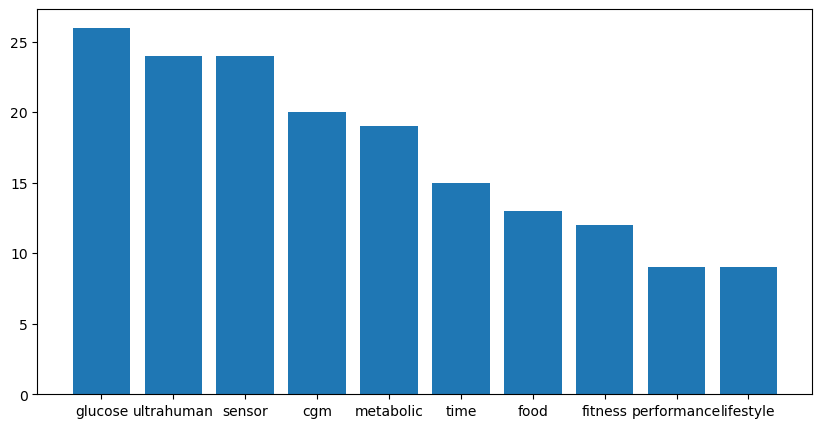

In [131]:
# Word frequency
tokens = [token for token in words if token not in stop_words]
word_freq = Counter(tokens)
common_words = word_freq.most_common(10)
words, counts = zip(*common_words)
plt.figure(figsize=(10, 5))
plt.bar(words, counts)
plt.show()

In [132]:
# Count vectorization
dictionary = [text]
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(dictionary)
print(X.toarray())


[[ 1  2  2  1  1  4  1  1  1  1  2  1  1  1  1  1  1  3  1  1  1  2  1  1
   1  1  1  1  4  3  1  1  3  1  2  1  1  1  1  7  1  1  1  1  1  2  1  2
   2  1  1  1  2  2  2  1  1  2  1  1  1  1  2  1  3  1  1  1  2  1  6  2
   2  2  1  1  1  4  5  1  2  1  1  2  1  1  1  1  1  1  1  1  1  1  2  1
   1  1  1  3 20  1  6  1  1  1  1  1  1  3  2  1  1  1  1  1  1  3  2  1
   1  2  3  1  1  1  2  1  2  1  1  1  1  3  1  3  4  1  1  3  1  2  1  1
   4  4  1  1  1  1  3  4  3  1  1  1  3  2  1  1  3  1  6  1  1  1  2  2
   2  1  1  1  1  1  1  1  1  1  1  1  2  5  2  1  1  1  2  1  1  1  1  1
   1  1  1  2  2  7  1  6  5  1  1  2  2  2  2  1  2  1  1  1  1  3 12  2
   1  4  2  1 13  8  1  3  1  2  3  2  1  1  2  1  6  1  1  1 26  1  1  1
   1  1  2  1  2  3  2  1  1  1  1  8  4  1  2  3  1  3  5  1  1  1  2  1
   1  1  1  3  1  2  1  1  1  5  1  1  8  1  2  1  1  1  1  1  1  2  1  1
   2  4  1  1  1  1  1  1  2  1  1  1  2  1  1  1  1  1  1  1  1  2  1  1
   1  2  1  6  1  1  9  8  2  1  1  4 

In [159]:
# Call the function
process_document(df, text)

In [184]:
def process_document(df, text):
# Create a dictionary to store the data frames
    df_dict = {}

In [187]:
for i in range(len(df)):
    text = df['text'].loc[i]

In [165]:
# Tokenization
sentences = nltk.sent_tokenize(text)

In [166]:
# Lowercasing and removing non-alphabetic characters
text = re.sub("[^A-Za-z]+"," ",text).lower()

In [167]:
# Tokenization
words = word_tokenize(text)

In [168]:
# Stop words removal
stop_words = set(stopwords.words('english'))
filtered_sentence = [word for word in words if not word in stop_words]
text = ' '.join(filtered_sentence)

In [169]:
# Stemming
ps = PorterStemmer()
stemmed_words = [ps.stem(word) for word in words]

In [170]:
# Lemmatization
lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(word, pos='v') for word in words]

In [171]:
# Sentiment polarity, length of review, word count
blob = TextBlob(text)
sentiment_polarity = blob.sentiment.polarity
review_length = len(text)
word_count = len(text.split())

In [172]:
# Word frequency
tokens = [token for token in words if token not in stop_words]
word_freq = Counter(tokens)
common_words = word_freq.most_common(10)

In [173]:
# Count vectorization
documents = [text]
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(documents)

In [219]:
# Create a new data frame for this row
df_row = pd.DataFrame({
    'sentences': [sentences],
    'filtered_text': [text],
    'stemmed_words': [stemmed_words],
    'lemmatized_words': [lemmatized_words],
    'sentiment_polarity': [sentiment_polarity],
    'review_length': [review_length],
    'word_count': [word_count],
    'common_words': [common_words],
    'vectorized_text': [X.toarray()]
})

In [218]:
# Add the new data frame to the dictionary
df_dict = {}
df_dict[f'df_{i}'] = df_row

In [212]:
# Return the dictionary of data frames
return df_dict

In [224]:
# Call the function
df_dict = process_document(df, text)

In [229]:
# Now you can access the data frame for each row like this:
print(df_dict['df_0'])  # This is df_0
print(df_dict['df_1'])  # This is df_1
# and so on...

In [231]:
# To concatenate them into one data frame:
df_concat_low = pd.concat(df_dict.values(), ignore_index=True)

In [235]:
# Now df_concat is a single data frame that contains all the rows
print(df_concat_low)

          text  value
0       Python      3
1  Programming      4


In [236]:
df_concat_low

,text,value
0,Python,3
1,Programming,4
